In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import calendar as cal

from sklearn.preprocessing import LabelEncoder

In [397]:
df_train = pd.read_csv('train.csv')
df_train_label = pd.read_csv('train_label.csv', header=None)
df_test = pd.read_csv('test.csv')
df_test_label = pd.read_csv('test_label.csv', header=None)

In [218]:
print(df_train.shape)
print(df_train_label.shape)
print(df_test.shape)
print(df_test_label.shape)

(8708, 9)
(8708, 1)
(2178, 9)
(2178, 1)


##### identifying the categorical columns

In [219]:
df_train.nunique()

datetime      8708
season           4
holiday          2
workingday       2
weather          4
temp            49
atemp           60
humidity        88
windspeed       28
dtype: int64

In [398]:
trainDF = df_train.join(df_train_label)
testDF = df_test.join(df_train_label)
trainDF = trainDF.rename(columns={0:"Bookings"})
testDF = testDF.rename(columns={0:"Bookings"})
trainDF.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Bookings
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


##### Missing Value Analysis

In [221]:
trainDF.isna().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
Bookings      False
dtype: bool

In [222]:
testDF.isna().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
Bookings      False
dtype: bool

In [399]:
train_test_splitter = trainDF.shape[0]

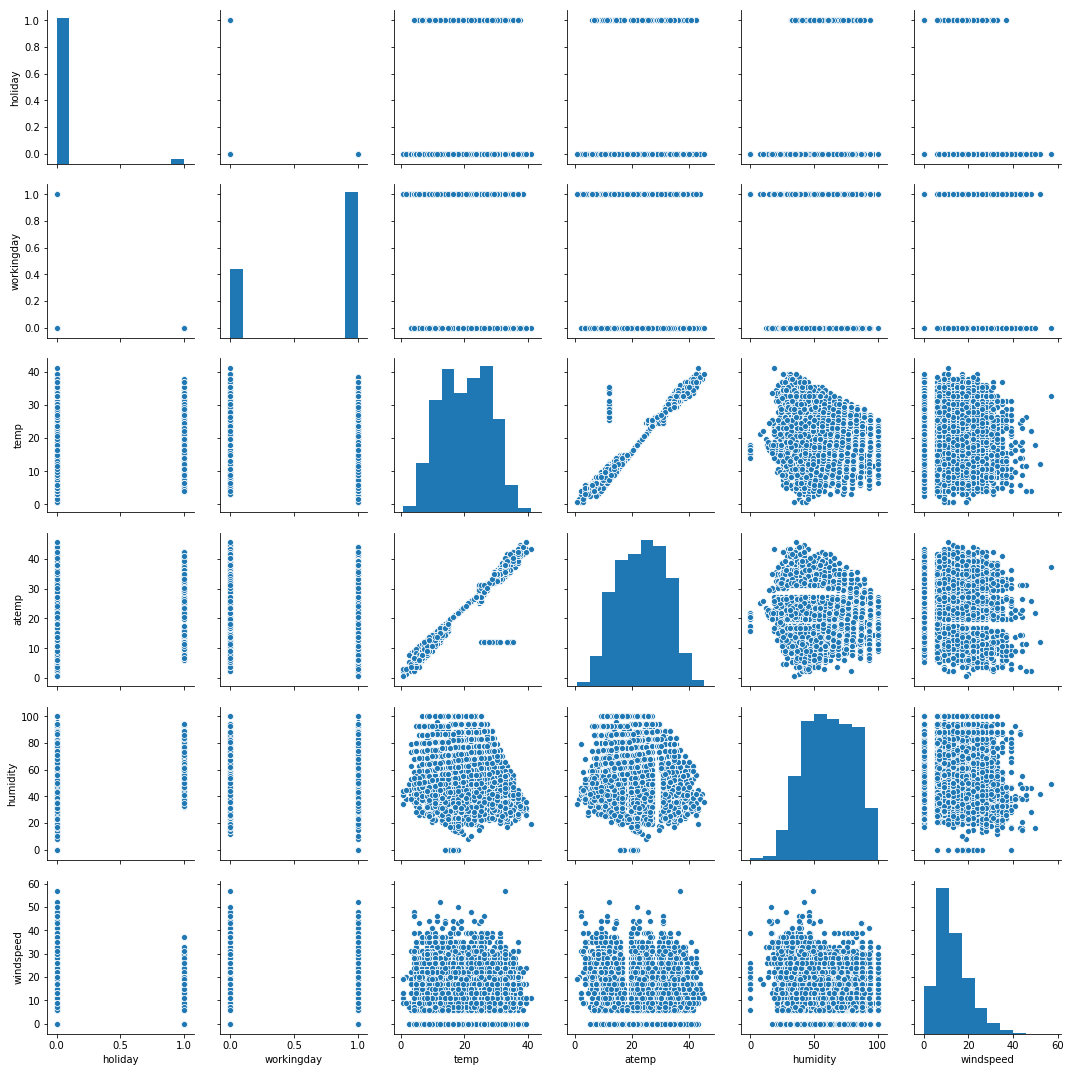

In [223]:
sns.pairplot(df_train)

There is no missing value in training set

#### identifying the categorical columns and plotting the graph in single go

In [400]:
catColumns = []
test = df_test.nunique()
for k, v in enumerate(test):
    if(v < 20):
        catColumns.append(trainDF.columns[k])
catColumns

['season', 'holiday', 'workingday', 'weather']

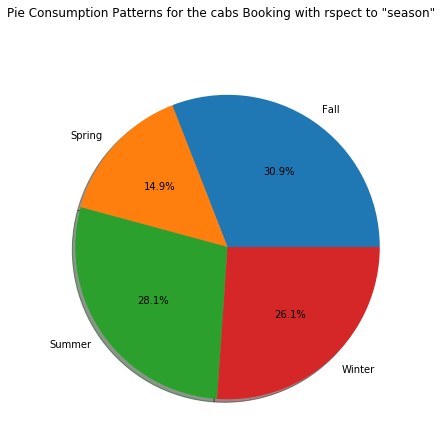

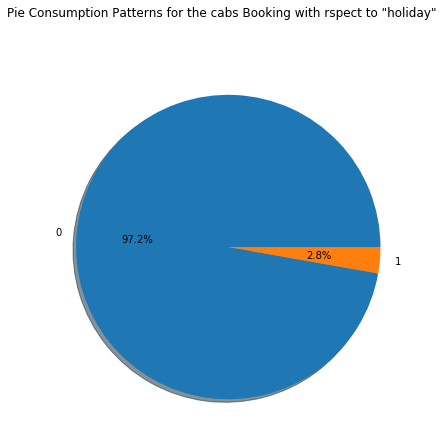

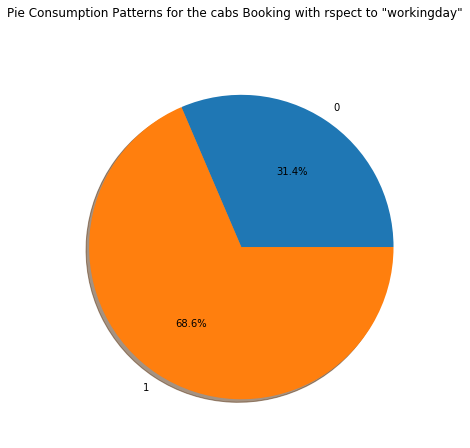

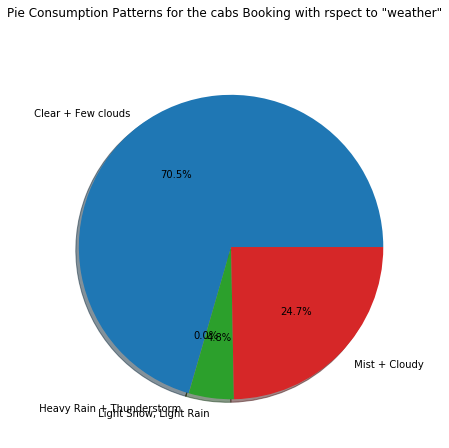

In [401]:
for i, item in enumerate(catColumns):
    sums = trainDF.groupby(item)['Bookings'].sum()
    plt.figure(figsize=(7,7))
    plt.pie(sums, labels=sums.index, autopct='%1.1f%%', shadow=True)
    plt.suptitle('Pie Consumption Patterns for the cabs Booking with rspect to '+ '"'+item + '"', fontsize=12)

<Figure size 432x288 with 0 Axes>

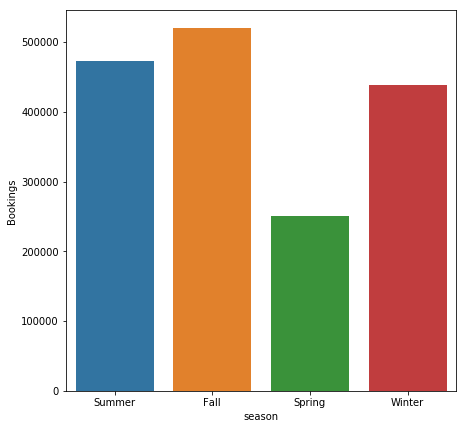

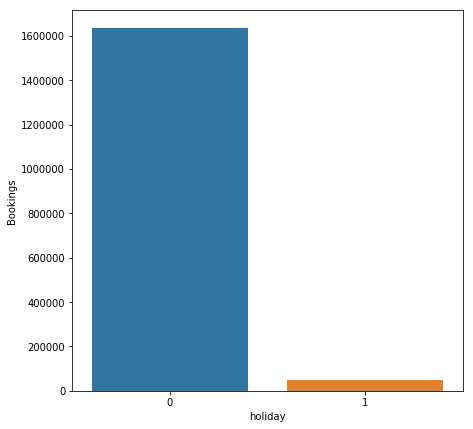

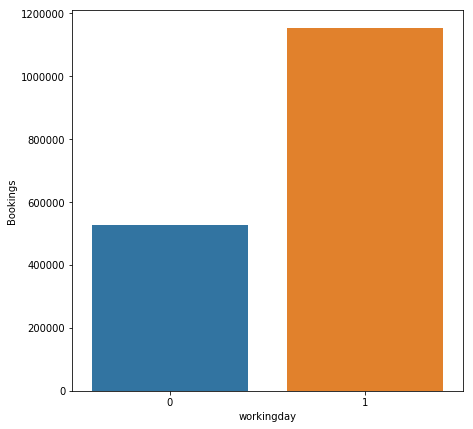

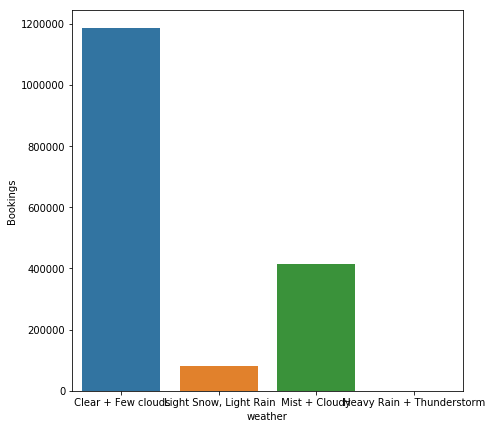

In [402]:
for i, item in enumerate(catColumns):
    plt.figure(i)
    plt.figure(figsize=(7,7))
    sns.barplot(x=trainDF[item], y='Bookings', data=trainDF, estimator=sum, ci=None)

<Figure size 432x288 with 0 Axes>

<Figure size 864x864 with 0 Axes>

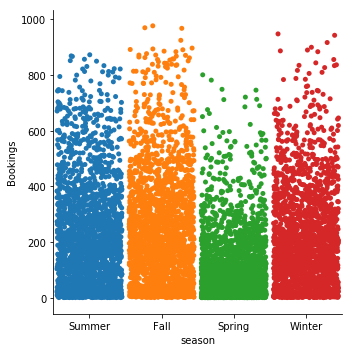

<Figure size 864x864 with 0 Axes>

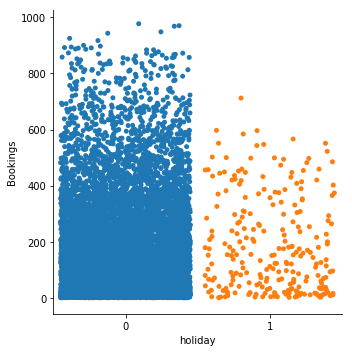

<Figure size 864x864 with 0 Axes>

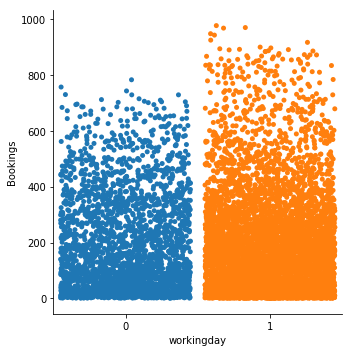

<Figure size 864x864 with 0 Axes>

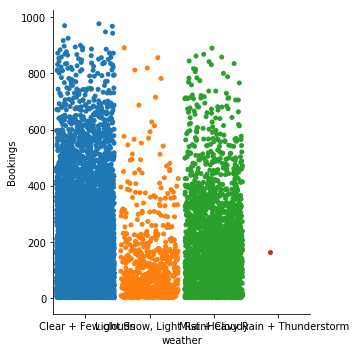

In [403]:
for i, item in enumerate(catColumns):
    plt.figure(i)
    plt.figure(figsize=(12,12))
    sns.catplot(x=item, y='Bookings', data=trainDF, jitter='0.45')

## Outlier Analysis

In [12]:
trainDF.Bookings.describe()

count    8708.000000
mean      193.007005
std       181.552211
min         1.000000
25%        43.000000
50%       148.000000
75%       286.000000
max       977.000000
Name: Bookings, dtype: float64

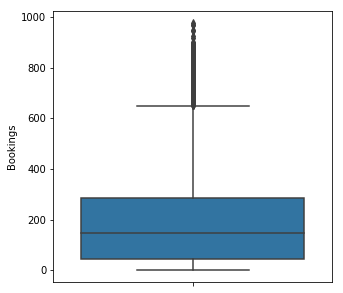

In [13]:
plt.figure(figsize=(5,5))
sns.boxplot(y=trainDF.Bookings)

In [14]:
'''stdDf = np.std(trainDF.Bookings)
varDf = np.var(trainDF.Bookings)
meanDf = np.mean(trainDF.Bookings)
print('StdD: ', stdDf, '\nVar: ', varDf, '\nmeanDf: ', meanDf)'''

StdD:  181.54178620709257 
Var:  32957.42013926171 
meanDf:  193.00700505282498


In [15]:
'''upperRange = meanDf + 3*stdDf
lowerRange = meanDf - 3*stdDf
print('Range of values should be: ', lowerRange, ' to ', upperRange)
print('Actual Range of values should be: ', 0, ' to ', int(np.round(upperRange,0)))'''

Range of values should be:  -351.6183535684527  to  737.6323636741026
Actual Range of values should be:  0  to  738


In [16]:
trainDF1 = df_train.join(df_train_label)
print(trainDF1.shape)

(8708, 10)


In [311]:
'''trainDF = trainDF[trainDF.Bookings < int(np.round(upperRange,0))]
train_test_splitter = trainDF.shape[0]
print(trainDF.shape)'''

'trainDF = trainDF[trainDF.Bookings < int(np.round(upperRange,0))]\ntrain_test_splitter = trainDF.shape[0]\nprint(trainDF.shape)'

## Feature Engineering

In [404]:
merged = pd.concat([trainDF, testDF])
merged.shape

(10886, 10)

##### creating new columns date, hour, month and weekday from the datetime column.

In [405]:
merged['date'] = merged.datetime.apply(lambda x : x.split()[0])
merged['hour'] = merged.datetime.apply(lambda x : x.split()[1].split(':')[0])
merged['month'] = merged.date.apply(lambda x : cal.month_name[dt.datetime.strptime(x, '%m/%d/%Y').month])
merged['weekday'] = merged.date.apply(lambda x : cal.day_name[dt.datetime.strptime(x, '%m/%d/%Y').weekday()])

In [406]:
nuniques = merged.nunique()
catColumns = []
for k, v in enumerate(nuniques):
    if(v < 10):
        catColumns.append(merged.columns[k])
        #merged[trainDF.columns[k]] = merged[trainDF.columns[k]].astype('category')
catColumns

['season', 'holiday', 'workingday', 'weather', 'weekday']

In [407]:
for item in catColumns:
    merged[item] = merged[item].astype('category')

<Figure size 432x288 with 0 Axes>

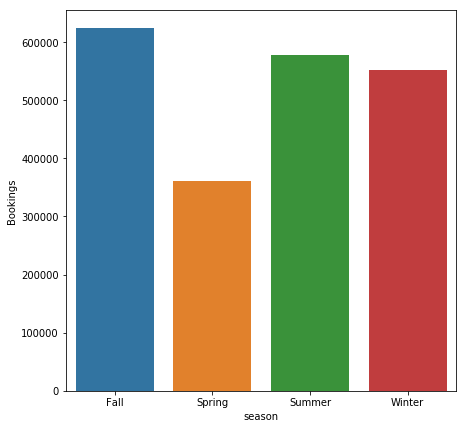

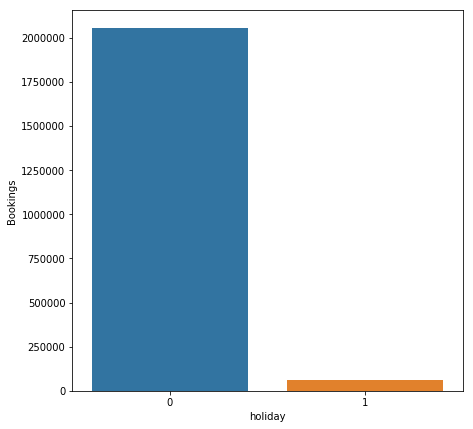

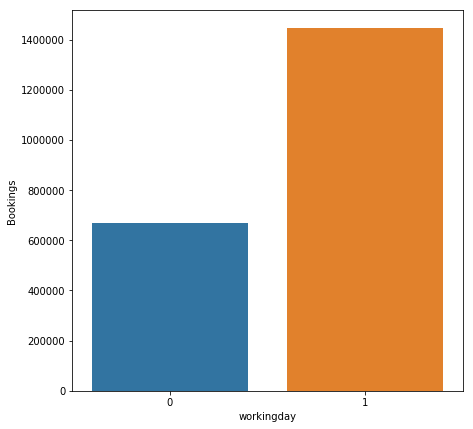

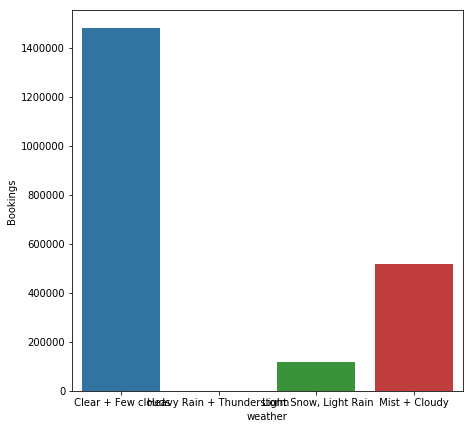

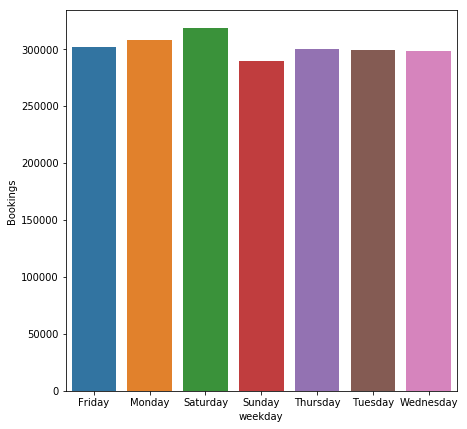

In [408]:
for i, item in enumerate(catColumns):
    plt.figure(i)
    plt.figure(figsize=(7,7))
    sns.barplot(x=merged[item], y='Bookings', data=merged, estimator=sum, ci=None)

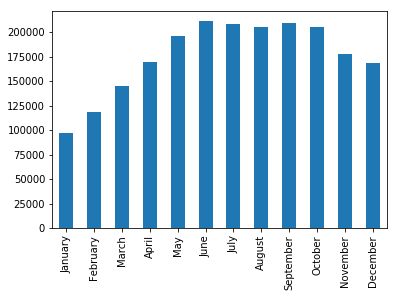

In [409]:
month=['January','February','March','April','May','June','July','August','September','October','November','December']
var = merged.groupby(pd.Categorical(merged['month'], categories=month)).Bookings.sum()
ax1.set_xlabel('month')
ax1.set_ylabel('Total Count of bookings')
ax1.set_title("Month wise Count of Total Cab bookings")
var.plot(kind='bar')

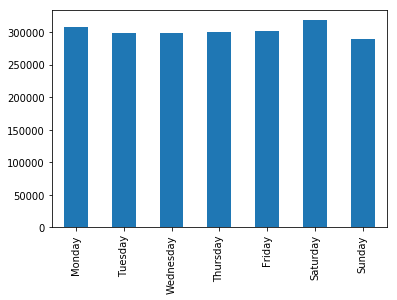

In [410]:
weekday=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
var = merged.groupby(pd.Categorical(merged['weekday'], categories=weekday)).Bookings.sum()
ax1.set_xlabel('Weekday')
ax1.set_ylabel('Total Count of bookings')
ax1.set_title("Month wise Count of Total Cab bookings")
var.plot(kind='bar')

#### Encoding the categorical variables

In [421]:
merged_Dummy = pd.get_dummies(data=merged, columns=['season', 'weather'], drop_first=False)
print(merged_Dummy.shape)
merged_Dummy.head()

merged['Month']=merged.datetime.apply(lambda x:x.split(" ")[0].split("/")[0])
merged['Month']=merged['Month'].astype('str').astype('int')
#merged['Weekday'] = merged.datetime.apply(lambda x:x.split(' ')[0].split("/")[1])
#merged['Weekday']=merged['Weekday'].astype('str').astype('int')
merged['year']=merged.date.apply(lambda x:x.split("/")[2])
merged['year']=merged['year'].astype('str').astype('int')


(10886, 22)


In [412]:
merged[(merged['workingday'] == 1) & ((merged['weekday'] == 'Sunday') | (merged['weekday'] == 'Saturday'))].shape

(0, 16)

##### Correlation Analysis

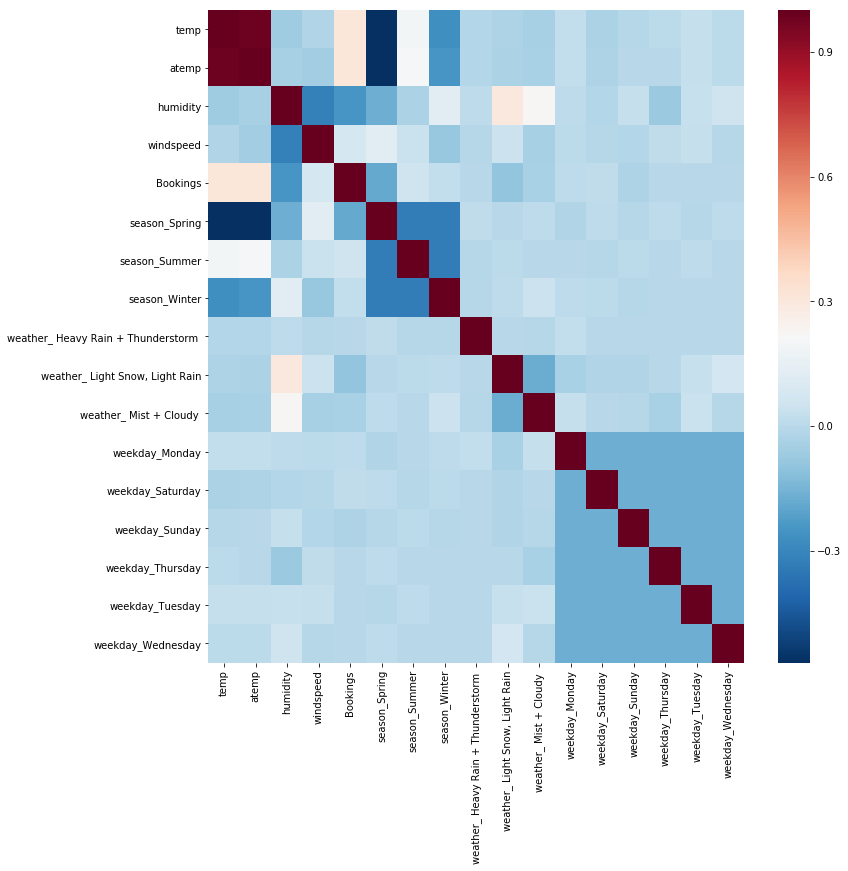

In [236]:
plt.figure(figsize=(12,12))
sns.heatmap(merged_Dummy.corr(),cmap='RdBu_r')

##### Dropping few features like atemp, datetime, weekday_Saturday and weekday_Sunday (as these are weekends and considered already in working day) as these are highly correlated to one or other column. datetime column is used in creating new columns.
##### Also dropped the 'weather_ Heavy Rain + Thunderstorm ' column as well. As it is redundant, as it has only one record with this flag as 1.

In [422]:
merged_Dummy.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'Bookings', 'date', 'hour', 'month', 'weekday', 'Month',
       'year', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter', 'weather_ Clear + Few clouds',
       'weather_ Heavy Rain + Thunderstorm ',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy '],
      dtype='object')

In [423]:
merged_drop=merged_Dummy.drop(columns={'atemp','datetime', 'weather_ Heavy Rain + Thunderstorm '})
merged_drop.shape

(10886, 19)

In [157]:
sns.pairplot(merged_drop)

##### Linear Regression does not work on date/datetime type so modifying it.

In [424]:
merged_drop.date = pd.to_datetime(merged_drop.date)
merged_drop.date = merged_drop.date.map(dt.datetime.toordinal)
merged_drop.hour = merged_drop.hour.astype('int64')
merged_Dummy1 = merged_drop
merged_drop = merged_drop.drop(columns={'date','month', 'weekday'})

In [425]:
train_test_splitter

8708

In [426]:
train_df_modulated = merged_drop[:train_test_splitter]
test_df_modulated = merged_drop[train_test_splitter:]

In [427]:
print(train_df_modulated.shape)
print(test_df_modulated.shape)

(8708, 16)
(2178, 16)


In [428]:
train_df_modulated.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Bookings',
       'hour', 'Month', 'year', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter', 'weather_ Clear + Few clouds',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy '],
      dtype='object')

## Regression Analysis

In [429]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
#import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import r2_score, mean_squared_error

In [430]:
y = train_df_modulated['Bookings']
X = train_df_modulated.drop(columns='Bookings', axis=1)
actual_y_test = test_df_modulated['Bookings']
actual_X_test = test_df_modulated.drop(columns='Bookings', axis=1)

In [431]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [432]:
print(X.shape)
print(y.shape)
print(actual_X_test.shape)
print(actual_y_test.shape)

(8708, 15)
(8708,)
(2178, 15)
(2178,)


### Simple Linear Regression

In [434]:
#linReg = linear_model.LinearRegression()

In [439]:
%%time
lr = linear_model.LinearRegression()
kfold = KFold(n_splits=5, random_state=162)
cv_results = cross_val_score(lr, X, y, cv=kfold, scoring='r2')
print("training data score: ",cv_results.mean())

lr = linear_model.LinearRegression()
kfold = KFold(n_splits=5, random_state=162)
cv_results = cross_val_score(lr, X_test, y_test, cv=kfold, scoring='r2')
print("testing data score:" ,cv_results.mean())

training data score:  0.3918634236359976
testing data score: 0.3563644393663094
Wall time: 148 ms


In [329]:
linReg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [330]:
print('Intercept: \n', linReg.intercept_)
print('Coefficients: \n', linReg.coef_)

Intercept: 
 -67.78601419298656
Coefficients: 
 [  1.77684003   3.00918036   9.12907859  -2.03769533   0.22840345
   7.50636023  10.41170571  72.82799423  57.46929115  46.61811655
 -32.53575709  12.18276637  -9.23905865  -8.99101646  -5.35377423
   2.2966523 ]


In [332]:
#linReg.score(X_test, y_test)

In [274]:
lm = linear_model.LinearRegression()
scores = cross_val_score(lm, X_train, y_train, cv=5)

In [275]:
print('scores:: ',scores, '\nmean:: ',np.mean(scores), '\nstd ::', np.std(scores))

scores::  [0.341962   0.3346155  0.37488183 0.36828533 0.32725402] 
mean::  0.3493997354036906 
std :: 0.01881663631207774


In [276]:
pred1 = linReg.predict(X_test)
pred1 = pd.DataFrame(pred1)
rmse_pred1 = np.sqrt(mean_squared_error(y_test ,pred1))
print('RMSE for Test data: ',rmse_pred1)

RMSE for Test data:  276.7452904611256


In [333]:
y_actual_pred1 = linReg.predict(actual_X_test)
y_actual_pred1 = pd.DataFrame(y_actual_pred1)
rmse_actual1 = np.sqrt(mean_squared_error(actual_y_test ,y_actual_pred1))
print('RMSE for actual Test data: ', rmse_actual1)

RMSE for actual Test data:  214.65835292489822


## Ensemble Learning

In [440]:
%%time
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X,y)
for i in zip(list(X.columns),model.feature_importances_):
     print(i)

('holiday', 0.006820074906405506)
('workingday', 0.02818737792430216)
('temp', 0.18765961416701651)
('humidity', 0.2034078716102286)
('windspeed', 0.1910997469722017)
('hour', 0.22547480773505685)
('Month', 0.06894137612124104)
('year', 0.02757159602091782)
('season_Fall', 0.0055906366951647595)
('season_Spring', 0.001885943973512496)
('season_Summer', 0.006126995966182348)
('season_Winter', 0.005151327517448958)
('weather_ Clear + Few clouds', 0.016226891121691508)
('weather_ Light Snow, Light Rain', 0.009468259395124577)
('weather_ Mist + Cloudy ', 0.016387479873505178)
Wall time: 2.21 s


In [442]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
model=GradientBoostingRegressor(random_state=216)
model.fit(X,y)
print("r2 score :",model.score(X,y))

pred_train=model.predict(X)
print("RMSE of training data:",np.sqrt(mean_squared_error(y,pred_train)))

pred_test=model.predict(actual_X_test)
print("RMSE of testing data:",np.sqrt(mean_squared_error(actual_y_test,pred_test)))

r2 score : 0.865398577404457
RMSE of training data: 66.6041713094881
RMSE of testing data: 240.8695782609376
Wall time: 586 ms


###### Adaboost Regressor

In [334]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold

In [335]:
adaModel = AdaBoostRegressor(n_estimators=200, random_state=6)
adaModel.fit(X,y)
kfold = KFold(n_splits=2, random_state=6)
adaResults = cross_val_score(adaModel, X, y, scoring='r2', cv=kfold)

In [336]:
print(adaResults.mean())
print(adaResults.std())

0.541453498081077
0.02690954780239746


In [338]:
'''y2 = adaModel.predict(X_test)
y2 = pd.DataFrame(y2)
rmse_y2 = np.sqrt(mean_squared_error(y_test ,y2))
print(rmse_y2)'''

'y2 = adaModel.predict(X_test)\ny2 = pd.DataFrame(y2)\nrmse_y2 = np.sqrt(mean_squared_error(y_test ,y2))\nprint(rmse_y2)'

In [339]:
y_pred_actual3 = adaModel.predict(actual_X_test)
y_pred_actual3 = pd.DataFrame(y_pred_actual3)
y_pred_actual3 = np.sqrt(mean_squared_error(actual_y_test ,y_pred_actual3))
print(y_pred_actual3)

241.65307800194668


##### AdaBoost with GridSearchCV

In [282]:
ada = AdaBoostRegressor(random_state=6)
param_dist = {
 'n_estimators': np.arange(50,500,50),
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }
ada_grid = GridSearchCV(estimator=ada, param_grid=param_dist)


In [283]:
ada_grid.fit(X,y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=6),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]), 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'loss': ['linear', 'square', 'exponential']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [284]:
ada_grid.best_estimator_

AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='square',
         n_estimators=50, random_state=6)

In [340]:
##ada = AdaBoostRegressor(learning_rate=0.05, loss='square', 
  ##           n_estimators=100, random_state=6)
ada = AdaBoostRegressor(learning_rate=1, loss='square', 
             n_estimators=50, random_state=6)

ada.fit(X, y)
y_ada = ada.predict(actual_X_test)
y_ada = pd.DataFrame(y_ada)

In [341]:
rmse_ada = np.sqrt(mean_squared_error(actual_y_test ,y_ada))
print('RMSE for test records: ', rmse_ada)

RMSE for test records:  239.46946588431547


In [343]:
#print("R-squared for Train: %.2f" %ada.score(X_train, y_train))
#print("R-squared for Test: %.2f" %ada.score(X_test, y_test))

In [344]:
y_actual_pred2 = ada.predict(actual_X_test)
y_actual_pred2 = pd.DataFrame(y_actual_pred2)
rmse_actual2 = np.sqrt(mean_squared_error(actual_y_test ,y_actual_pred2))
print('RMSE for actual Test data: ', rmse_actual2)

RMSE for actual Test data:  239.46946588431547


### GradientBoost Regressor

In [289]:
from sklearn.ensemble import GradientBoostingRegressor

In [290]:
#gdbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, loss='ls', max_depth=4)
gdbr = GradientBoostingRegressor()
gdbr.fit(X, y)
y_gdbr = gdbr.predict(actual_X_test)
y_gdbr = pd.DataFrame(y_gdbr)

In [292]:
rmse_gdbr = np.sqrt(mean_squared_error(actual_y_test ,y_gdbr))
print(rmse_gdbr)

238.27435213727102


In [209]:
print(len(X_train.columns))
print(X_train.columns)
print('Feature Importances:: ', np.round(gdbr.feature_importances_,3))

26
Index(['temp', 'humidity', 'windspeed', 'hour', 'season_Spring',
       'season_Summer', 'season_Winter', 'holiday_1', 'workingday_1',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy ',
       'weekday_Monday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September'],
      dtype='object')
Feature Importances::  [0.119 0.036 0.003 0.7   0.03  0.    0.017 0.    0.068 0.02  0.    0.001
 0.    0.    0.    0.    0.    0.    0.001 0.    0.    0.    0.001 0.
 0.001 0.001]


In [210]:
print("R-squared for Train: %.2f" %gdbr.score(X_train, y_train))
print("R-squared for Test: %.2f" %gdbr.score(X_test, y_test))

R-squared for Train: 0.80
R-squared for Test: 0.78


###### GridSearchCV for parameters selection

In [212]:
params = {'n_estimators':np.arange(350,500,100), 'learning_rate':np.arange(.1,1,.1), 'max_depth':np.arange(1,5,1), 'max_features':np.arange(2,10,1)}
#params = {'n_estimators':np.arange(50,200,50), 'max_depth':np.arange(1,5,1), 'learning_rate':np.arange(.1,1,.1), 'min_samples_leaf':np.arange(1,16,2), 'max_features':np.arange(2,10,1)}

In [213]:
gdbr_grid = GridSearchCV(estimator=gdbr, param_grid=params)

In [214]:
gdbr_grid.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([350, 450]), 'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'max_depth': array([1, 2, 3, 4]), 'max_features': array([2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [215]:
gdbr_grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=4, max_features=9,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=450, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [211]:
gdbr_grid.best_score_

0.8514642226481192

In [179]:
gdbr = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse',
             learning_rate=0.3, loss='ls', min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=450, random_state=6, tol=0.0001)
gdbr.fit(X_train, y_train)
y_gdbr = gdbr.predict(X_test)
y_gdbr = pd.DataFrame(y_gdbr)

In [180]:
gdbr = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=4, max_features=9,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=450, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
gdbr.fit(X_train, y_train)
y_gdbr = gdbr.predict(X_test)
y_gdbr = pd.DataFrame(y_gdbr)

In [181]:
rmse_gdbr = np.sqrt(mean_squared_error(y_test ,y_gdbr))
print('RMSE for test records: ', rmse_gdbr)

RMSE for test records:  63.42816546995473


In [182]:
print("R-squared for Train: %.2f" %gdbr.score(X_train, y_train))
print("R-squared for Test: %.2f" %gdbr.score(X_test, y_test))

R-squared for Train: 0.93
R-squared for Test: 0.86


In [183]:
y_actual_pred = gdbr.predict(actual_X_test)
y_actual_pred = pd.DataFrame(y_actual_pred)
rmse_actual = np.sqrt(mean_squared_error(actual_y_test ,y_actual_pred))

In [184]:
print('RMSE for test records: ', rmse_actual)

RMSE for test records:  247.40042394714612


# Conclusions

##### The time and atime columns are highly correlated, so it is better to drop either of the column for better modelling.
##### The datetime column is divided into multiple columns, like date, day, weekday, month.
##### The Weekday's Saturday and Sunday are just similar to Workday = 0, so removed those columns as well.
##### We have dropped one more column 'weather_ Heavy Rain + Thunderstorm ' as it was having one record with this value. That we have conclude form the visualizations.
##### There were few outliers in the train dataset as the values were greater than the mean + 3*std dev, so removed those rows as well as a part of outlier analysis.

##### Used Linear Regression with AdaBoost Regressor and GradientBoost Regressor for modelling
##### From Feature importances, we can see that the top 5 most important features were, 
    1. hour - 0.6
    2. temp/atemp - 0.1
    3. year - 0.089
    4. workingday - 0.072
    5. Humidity - 0.036

##### The best method found to be Randomforest Regressor.
##### Used GridSearchCV to tune the model, which resulted in best params as for Randomforest Regressor
    n_estimators=1000
    
##### Although the difference of RMSE of Train and Test data for Randomforest Regressor with Parameter Tuning is a more than the other models but the RMSE of both Train and Test data is reduced significantly.